# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load, Explore and Cleaningdata

In [2]:
data_covid = pd.read_csv('covid_19_indonesia.csv',sep=';')
data_covid

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,03/01/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204.698.991,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,03/02/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204.698.991,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.00,1.00
2,03/02/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,03/02/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511647851,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,03/03/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204.698.991,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31817,9/15/2022,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,...,1.259.638.212,14.01,19974.38,0.0,459.14,45.91,2.30%,96.64%,2.85,1.00
31818,9/15/2022,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,...,-0.850253225,2.36,18959.11,0.0,429.59,42.96,2.27%,97.54%,6.50,1.00
31819,9/15/2022,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,...,-3.216.211.808,1.95,10002.74,0.0,410.83,41.08,4.11%,95.51%,3.20,1.00
31820,9/15/2022,ID-SU,Sumatera Utara,50,0,5,45,158866,3288,154924,...,2.191.894.453,3.36,10680.15,0.0,221.04,22.10,2.07%,97.52%,1.92,1.00


In [3]:
data_covid.dtypes

Date                            object
Location ISO Code               object
Location                        object
New Cases                        int64
New Deaths                       int64
New Recovered                    int64
New Active Cases                 int64
Total Cases                      int64
Total Deaths                     int64
Total Recovered                  int64
Total Active Cases               int64
Location Level                  object
City or Regency                float64
Province                        object
Country                         object
Continent                       object
Island                          object
Time Zone                       object
Special Status                  object
Total Regencies                  int64
Total Cities                   float64
Total Districts                  int64
Total Urban Villages           float64
Total Rural Villages           float64
Area (km2)                       int64
Population               

In [4]:
data_covid.select_dtypes(include='object')

,Date,Location ISO Code,Location,Location Level,Province,Country,Continent,Island,Time Zone,Special Status,Longitude,Latitude,Case Fatality Rate,Case Recovered Rate
0,03/01/2020,ID-JK,DKI Jakarta,Province,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1.068.361.183,-6.204.698.991,51.28%,192.31%
1,03/02/2020,ID-JK,DKI Jakarta,Province,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1.068.361.183,-6.204.698.991,48.78%,182.93%
2,03/02/2020,IDN,Indonesia,Country,NaN,Indonesia,Asia,NaN,NaN,NaN,113.921.327,-0.789275,0.00%,0.00%
3,03/02/2020,ID-RI,Riau,Province,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,1.018.051.092,0.511647851,0.00%,100.00%
4,03/03/2020,ID-JK,DKI Jakarta,Province,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1.068.361.183,-6.204.698.991,46.51%,174.42%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31817,9/15/2022,ID-SA,Sulawesi Utara,Province,Sulawesi Utara,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,1.245.212.396,1.259.638.212,2.30%,96.64%
31818,9/15/2022,ID-SB,Sumatera Barat,Province,Sumatera Barat,Indonesia,Asia,Sumatera,UTC+07:00,NaN,1.004.650.624,-0.850253225,2.27%,97.54%
31819,9/15/2022,ID-SS,Sumatera Selatan,Province,Sumatera Selatan,Indonesia,Asia,Sumatera,UTC+07:00,NaN,1.041.694.647,-3.216.211.808,4.11%,95.51%
31820,9/15/2022,ID-SU,Sumatera Utara,Province,Sumatera Utara,Indonesia,Asia,Sumatera,UTC+07:00,NaN,9.905.196.442,2.191.894.453,2.07%,97.52%


In [5]:
data_covid['Country'].unique()

array(['Indonesia'], dtype=object)

In [6]:
data_covid['Continent'].unique()

array(['Asia'], dtype=object)

In [7]:
drop_list = ['Location ISO Code','Location','Country']
change_type_list = ['Case Fatality Rate','Case Recovered Rate','Date']

In [8]:
data_covid.drop(columns=drop_list, axis=1, inplace=True)

In [9]:
data_covid.head()

,Date,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,03/01/2020,2,0,0,2,39,20,75,-56,Province,...,-6.204.698.991,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,03/02/2020,2,0,0,2,41,20,75,-54,Province,...,-6.204.698.991,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,03/02/2020,2,0,0,2,2,0,0,2,Country,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,03/02/2020,1,0,0,1,1,0,1,0,Province,...,0.511647851,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,03/03/2020,2,0,0,2,43,20,75,-52,Province,...,-6.204.698.991,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


In [10]:
data_covid[['Case Fatality Rate','Case Recovered Rate']] = data_covid[['Case Fatality Rate','Case Recovered Rate']].applymap(lambda x: x.replace('%',''))
data_covid[['Case Fatality Rate','Case Recovered Rate']]

,Case Fatality Rate,Case Recovered Rate
0,51.28,192.31
1,48.78,182.93
2,0.00,0.00
3,0.00,100.00
4,46.51,174.42
...,...,...
31817,2.30,96.64
31818,2.27,97.54
31819,4.11,95.51
31820,2.07,97.52


In [11]:
data_covid[['Case Fatality Rate','Case Recovered Rate']] = data_covid[['Case Fatality Rate','Case Recovered Rate']].astype(float)
data_covid[['Case Fatality Rate','Case Recovered Rate']].dtypes

Case Fatality Rate     float64
Case Recovered Rate    float64
dtype: object

In [12]:
pd.to_datetime(data_covid['Date'])

0       2020-03-01
1       2020-03-02
2       2020-03-02
3       2020-03-02
4       2020-03-03
           ...    
31817   2022-09-15
31818   2022-09-15
31819   2022-09-15
31820   2022-09-15
31821   2022-09-16
Name: Date, Length: 31822, dtype: datetime64[ns]

In [13]:
data_covid['Date'] = pd.to_datetime(data_covid['Date'])

In [14]:
data_covid.columns = data_covid.columns.str.lower().str.replace(' ','_')
data_covid.columns

Index(['date', 'new_cases', 'new_deaths', 'new_recovered', 'new_active_cases',
       'total_cases', 'total_deaths', 'total_recovered', 'total_active_cases',
       'location_level', 'city_or_regency', 'province', 'continent', 'island',
       'time_zone', 'special_status', 'total_regencies', 'total_cities',
       'total_districts', 'total_urban_villages', 'total_rural_villages',
       'area_(km2)', 'population', 'population_density', 'longitude',
       'latitude', 'new_cases_per_million', 'total_cases_per_million',
       'new_deaths_per_million', 'total_deaths_per_million',
       'total_deaths_per_100rb', 'case_fatality_rate', 'case_recovered_rate',
       'growth_factor_of_new_cases', 'growth_factor_of_new_deaths'],
      dtype='object')

In [15]:
data_null = data_covid.isna().any()
data_null

date                           False
new_cases                      False
new_deaths                     False
new_recovered                  False
new_active_cases               False
total_cases                    False
total_deaths                   False
total_recovered                False
total_active_cases             False
location_level                 False
city_or_regency                 True
province                        True
continent                      False
island                          True
time_zone                       True
special_status                  True
total_regencies                False
total_cities                    True
total_districts                False
total_urban_villages            True
total_rural_villages            True
area_(km2)                     False
population                     False
population_density             False
longitude                      False
latitude                       False
new_cases_per_million          False
t

In [16]:
data_null[data_null].index.to_list()

['city_or_regency',
 'province',
 'island',
 'time_zone',
 'special_status',
 'total_cities',
 'total_urban_villages',
 'total_rural_villages',
 'growth_factor_of_new_cases',
 'growth_factor_of_new_deaths']

In [17]:
have_null = data_null[data_null].index.to_list()

In [18]:
data_covid[have_null].isna().mean()

city_or_regency                1.000000
province                       0.029194
island                         0.029194
time_zone                      0.029194
special_status                 0.856766
total_cities                   0.028314
total_urban_villages           0.028408
total_rural_villages           0.029194
growth_factor_of_new_cases     0.060933
growth_factor_of_new_deaths    0.108321
dtype: float64

In [19]:
data_covid['special_status']

0        Daerah Khusus Ibu Kota
1        Daerah Khusus Ibu Kota
2                           NaN
3                           NaN
4        Daerah Khusus Ibu Kota
                  ...          
31817                       NaN
31818                       NaN
31819                       NaN
31820                       NaN
31821                       NaN
Name: special_status, Length: 31822, dtype: object

In [20]:
data_covid[data_covid['province'].isna()]

,date,new_cases,new_deaths,new_recovered,new_active_cases,total_cases,total_deaths,total_recovered,total_active_cases,location_level,...,latitude,new_cases_per_million,total_cases_per_million,new_deaths_per_million,total_deaths_per_million,total_deaths_per_100rb,case_fatality_rate,case_recovered_rate,growth_factor_of_new_cases,growth_factor_of_new_deaths
2,2020-03-02,2,0,0,2,2,0,0,2,Country,...,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00,0.00,NaN,NaN
5,2020-03-03,0,0,0,0,2,0,0,2,Country,...,-0.789275,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,1.00
9,2020-03-04,0,0,0,0,2,0,0,2,Country,...,-0.789275,0.00,0.01,0.00,0.00,0.00,0.00,0.00,1.00,1.00
13,2020-03-05,0,0,0,0,2,0,0,2,Country,...,-0.789275,0.00,0.01,0.00,0.00,0.00,0.00,0.00,1.00,1.00
18,2020-03-06,2,0,0,2,4,0,0,4,Country,...,-0.789275,0.01,0.02,0.00,0.00,0.00,0.00,0.00,NaN,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31690,2022-09-12,1848,17,3465,-1634,6394340,157787,6204241,32312,Country,...,-0.789275,6.97,24112.70,0.06,595.01,59.50,2.47,97.03,0.95,1.31
31725,2022-09-13,2896,20,3617,-741,6397236,157807,6207858,31571,Country,...,-0.789275,10.92,24123.62,0.08,595.08,59.51,2.47,97.04,1.57,1.18
31760,2022-09-14,2799,21,3938,-1160,6400035,157828,6211796,30411,Country,...,-0.789275,10.55,24134.18,0.08,595.16,59.52,2.47,97.06,0.97,1.05
31794,2022-09-15,2651,21,3915,-1285,6402686,157849,6215711,29126,Country,...,-0.789275,10.00,24144.18,0.08,595.24,59.52,2.47,97.08,0.95,1.00


In [21]:
data_covid['total_urban_villages']

0         267.0
1         267.0
2        8488.0
3         268.0
4         267.0
          ...  
31817     332.0
31818     230.0
31819     387.0
31820     693.0
31821    8488.0
Name: total_urban_villages, Length: 31822, dtype: float64

In [22]:
data_covid = data_covid.dropna(subset=['total_cities',
                                       'total_urban_villages',
                                       'total_rural_villages',
                                       'growth_factor_of_new_cases',
                                       'growth_factor_of_new_deaths'])
data_covid.isna().any()

date                           False
new_cases                      False
new_deaths                     False
new_recovered                  False
new_active_cases               False
total_cases                    False
total_deaths                   False
total_recovered                False
total_active_cases             False
location_level                 False
city_or_regency                 True
province                        True
continent                      False
island                          True
time_zone                       True
special_status                  True
total_regencies                False
total_cities                   False
total_districts                False
total_urban_villages           False
total_rural_villages           False
area_(km2)                     False
population                     False
population_density             False
longitude                      False
latitude                       False
new_cases_per_million          False
t

In [23]:
data_covid.columns

Index(['date', 'new_cases', 'new_deaths', 'new_recovered', 'new_active_cases',
       'total_cases', 'total_deaths', 'total_recovered', 'total_active_cases',
       'location_level', 'city_or_regency', 'province', 'continent', 'island',
       'time_zone', 'special_status', 'total_regencies', 'total_cities',
       'total_districts', 'total_urban_villages', 'total_rural_villages',
       'area_(km2)', 'population', 'population_density', 'longitude',
       'latitude', 'new_cases_per_million', 'total_cases_per_million',
       'new_deaths_per_million', 'total_deaths_per_million',
       'total_deaths_per_100rb', 'case_fatality_rate', 'case_recovered_rate',
       'growth_factor_of_new_cases', 'growth_factor_of_new_deaths'],
      dtype='object')

In [24]:
data_covid = data_covid.drop(columns=['city_or_regency','special_status'], axis=1)

In [25]:
data_covid.isna().sum().any()

True

In [26]:
data_covid.fillna('tidak ada data', inplace=True)

In [27]:
data_covid.isna().sum().any()

False

In [28]:
data_covid.duplicated().any()

False

In [29]:
data_covid.corr()

,new_cases,new_deaths,new_recovered,new_active_cases,total_cases,total_deaths,total_recovered,total_active_cases,total_regencies,total_cities,...,population_density,new_cases_per_million,total_cases_per_million,new_deaths_per_million,total_deaths_per_million,total_deaths_per_100rb,case_fatality_rate,case_recovered_rate,growth_factor_of_new_cases,growth_factor_of_new_deaths
new_cases,1.000000,0.721571,0.859081,0.329367,0.450265,0.441124,0.415569,0.925709,0.498316,0.502437,...,0.048208,0.215364,0.021978,0.133704,0.029598,0.029598,-0.012106,-0.003292,-0.013119,0.014281
new_deaths,0.721571,1.000000,0.793924,-0.102851,0.333780,0.345886,0.301712,0.805062,0.438626,0.440833,...,0.054121,0.140112,-0.003808,0.254009,0.023596,0.023596,-0.003552,-0.004792,-0.016940,0.048186
new_recovered,0.859081,0.793924,1.000000,-0.200039,0.510588,0.495394,0.476329,0.948166,0.514147,0.518455,...,0.049191,0.160875,0.040397,0.153113,0.046364,0.046364,-0.013051,-0.001170,-0.019110,0.029160
new_active_cases,0.329367,-0.102851,-0.200039,1.000000,-0.075928,-0.066679,-0.078927,0.021077,0.004297,0.004306,...,0.000776,0.115399,-0.030593,-0.033622,-0.028221,-0.028221,0.000523,-0.003952,0.010254,-0.027879
total_cases,0.450265,0.333780,0.510588,-0.075928,1.000000,0.978858,0.999093,0.490725,0.733671,0.738041,...,0.051837,0.017391,0.144222,0.007350,0.163184,0.163183,-0.017620,0.013560,-0.023764,0.009715
total_deaths,0.441124,0.345886,0.495394,-0.066679,0.978858,1.000000,0.977059,0.473213,0.735605,0.738691,...,0.074261,0.009305,0.130882,0.014587,0.197641,0.197640,-0.008651,0.013538,-0.024990,0.010518
total_recovered,0.415569,0.301712,0.476329,-0.078927,0.999093,0.977059,1.000000,0.453572,0.722612,0.726937,...,0.049379,0.009010,0.146797,0.000225,0.164667,0.164666,-0.017504,0.014161,-0.023195,0.009046
total_active_cases,0.925709,0.805062,0.948166,0.021077,0.490725,0.473213,0.453572,1.000000,0.562950,0.566671,...,0.060474,0.185309,0.021515,0.145402,0.023099,0.023099,-0.016025,-0.006117,-0.021852,0.017721
total_regencies,0.498316,0.438626,0.514147,0.004297,0.733671,0.735605,0.722612,0.562950,1.000000,0.993700,...,-0.060945,-0.017597,-0.030726,-0.007401,-0.012077,-0.012077,-0.001905,-0.013942,-0.023773,0.013043
total_cities,0.502437,0.440833,0.518455,0.004306,0.738041,0.738691,0.726937,0.566671,0.993700,1.000000,...,-0.011732,-0.012454,-0.024197,-0.003734,-0.003933,-0.003933,0.003566,-0.007085,-0.024845,0.016176


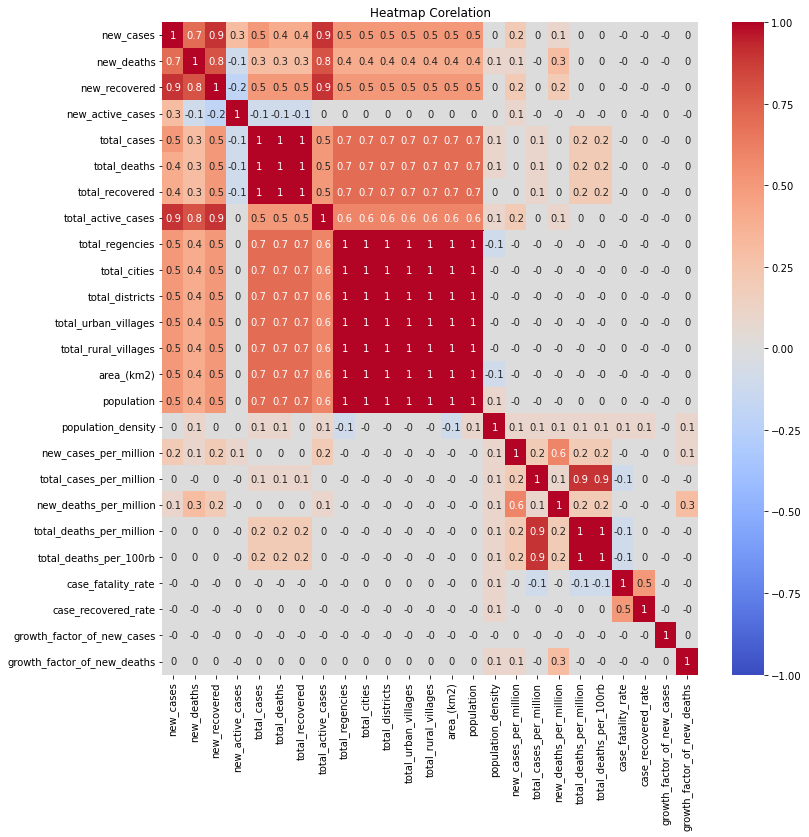

In [30]:
plt.figure(figsize=(12,12))
sns.heatmap(data_covid.corr().round(1), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap Corelation')
plt.show()

# Data Visualization

In [31]:
print(f'start date:\t',data_covid['date'].min())
print('end date:\t',data_covid['date'].max())

start date:	 2020-03-03 00:00:00
end date:	 2022-09-16 00:00:00


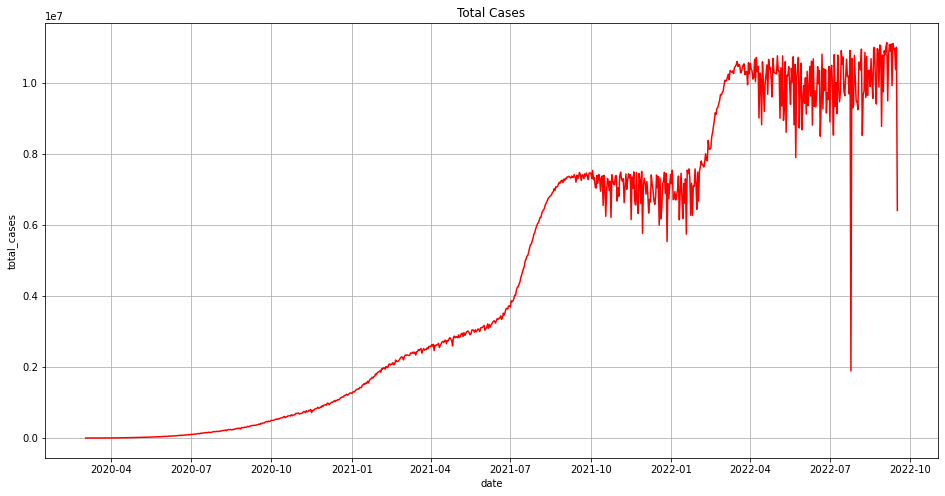

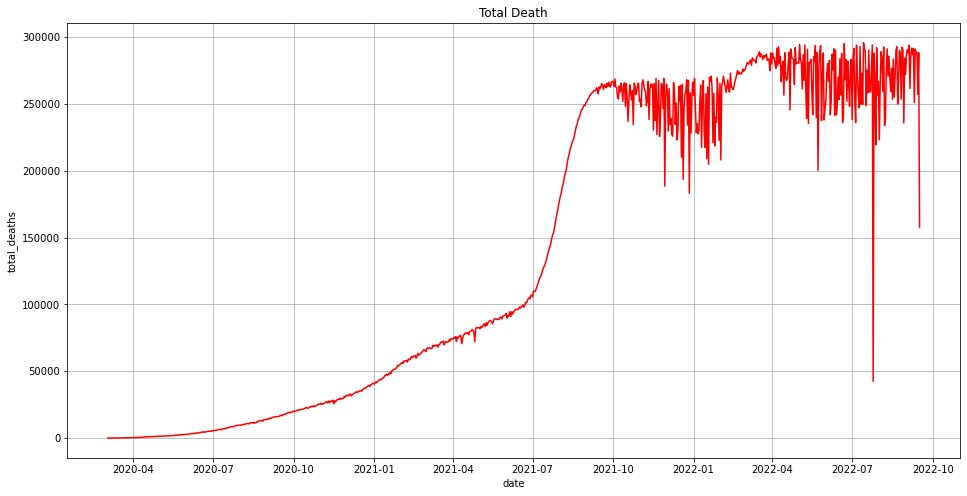

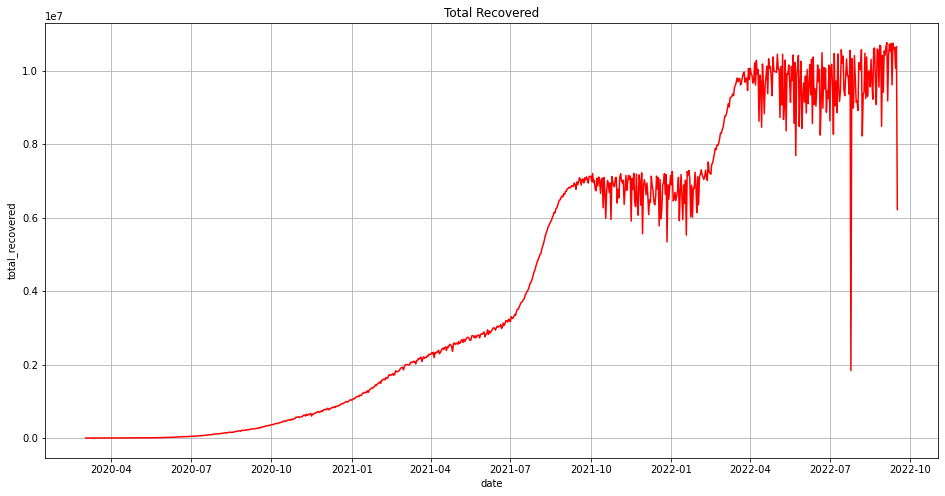

In [32]:
total_cases_by_date = data_covid.groupby(['date'])['total_cases'].sum()
total_death_by_date = data_covid.groupby(['date'])['total_deaths'].sum()
total_recovered_by_date = data_covid.groupby(['date'])['total_recovered'].sum()

for d,n in zip([total_cases_by_date, total_death_by_date, total_recovered_by_date],['Total Cases', 'Total Death', 'Total Recovered']):
    plt.figure(figsize=(16,8))
    sns.lineplot(x=d.index, y=d, color='red')
    plt.title(n)
    plt.grid()
    plt.show()

In [33]:
total_cases = data_covid['total_cases'].sum()
total_deaths = data_covid['total_deaths'].sum()
total_recovered = data_covid['total_recovered'].sum()
total_active_cases = data_covid['total_active_cases'].sum()

total_cases == total_deaths + total_recovered + total_active_cases

True

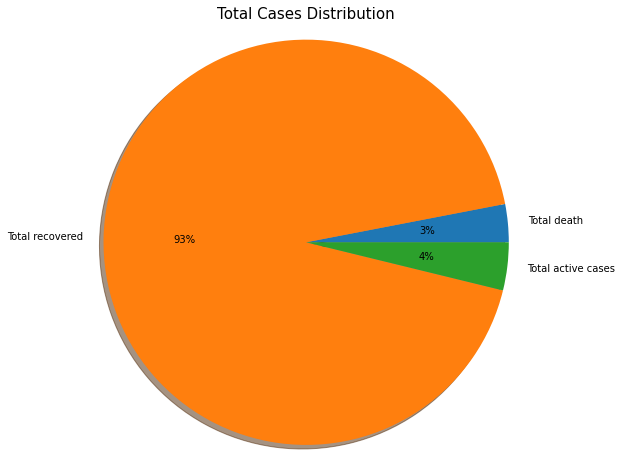

In [73]:
data_pie = [total_deaths, total_recovered, total_active_cases]
label_pie = ['Total death','Total recovered','Total active cases']

plt.figure(figsize=(8,8))
plt.pie(data_pie, labels=label_pie, autopct='%1.0f%%', shadow=True)
plt.title('Total Cases Distribution', fontsize=15)
plt.axis('equal')
plt.show()

In [35]:
data_covid['province']

5          tidak ada data
7                    Riau
9          tidak ada data
10             Jawa Barat
11                   Riau
               ...       
31817      Sulawesi Utara
31818      Sumatera Barat
31819    Sumatera Selatan
31820      Sumatera Utara
31821      tidak ada data
Name: province, Length: 24325, dtype: object

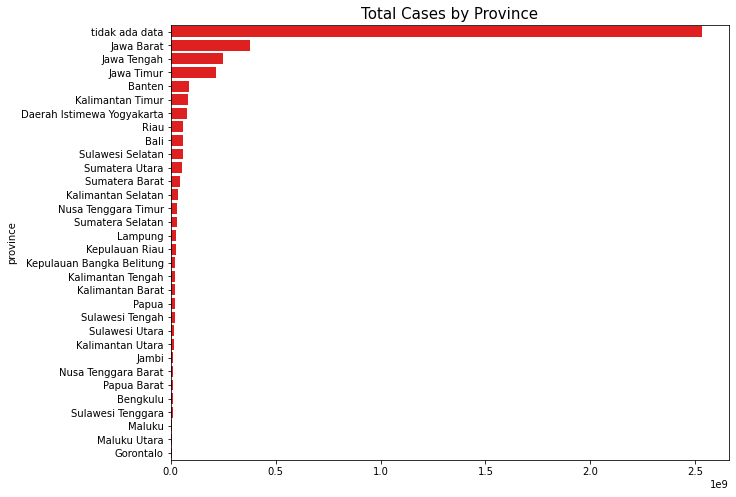

In [36]:
total_cases_by_province = data_covid.groupby(['province'])['total_cases'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x=total_cases_by_province.values, y=total_cases_by_province.index, color='red')
plt.title('Total Cases by Province', fontsize=15)
plt.show()


# Make a Total Cases Prediction by Province

## Data Cleaning

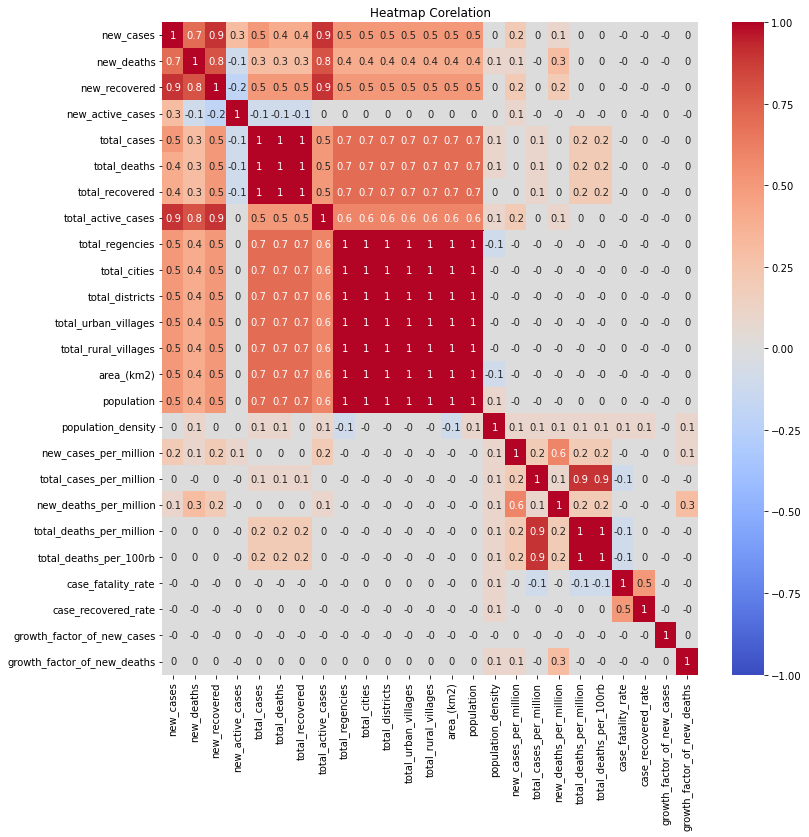

In [37]:
plt.figure(figsize=(12,12))
sns.heatmap(data_covid.corr().round(1), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap Corelation')
plt.show()

In [38]:
data_covid_clean = data_covid[['date','total_cases','province',
                              'time_zone']]
data_covid_clean.head()

,date,total_cases,province,time_zone
5,2020-03-03,2,tidak ada data,tidak ada data
7,2020-03-03,1,Riau,UTC+07:00
9,2020-03-04,2,tidak ada data,tidak ada data
10,2020-03-04,2,Jawa Barat,UTC+07:00
11,2020-03-04,1,Riau,UTC+07:00


In [39]:
data_covid_clean = data_covid_clean[(data_covid_clean['province']!='tidak ada data')]

In [40]:
data_covid_clean['time_zone'].unique()

array(['UTC+07:00', 'UTC+08:00', 'UTC+09:00'], dtype=object)

In [41]:
X = data_covid_clean.drop(columns=['total_cases'])
y = data_covid_clean['total_cases']

In [42]:
X['date'] = (X['date'] - pd.Timestamp('1970-01-01')) // pd.Timedelta('1D')
X['date'] = pd.to_numeric(X['date'])
X

,date,province,time_zone
7,18324,Riau,UTC+07:00
10,18325,Jawa Barat,UTC+07:00
11,18325,Riau,UTC+07:00
14,18326,Jawa Barat,UTC+07:00
15,18326,Riau,UTC+07:00
...,...,...,...
31815,19250,Sulawesi Tengah,UTC+08:00
31817,19250,Sulawesi Utara,UTC+08:00
31818,19250,Sumatera Barat,UTC+07:00
31819,19250,Sumatera Selatan,UTC+07:00


In [43]:
len(X['province'].unique())

31

In [44]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()
onehot.fit(X['province'].sort_values().values.reshape(-1,1))
province_encoding = onehot.transform(X['province'].values.reshape(-1,1))
province_array = province_encoding.toarray()
province_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [45]:
onehot.get_feature_names()

array(['x0_Bali', 'x0_Banten', 'x0_Bengkulu',
       'x0_Daerah Istimewa Yogyakarta', 'x0_Gorontalo', 'x0_Jambi',
       'x0_Jawa Barat', 'x0_Jawa Tengah', 'x0_Jawa Timur',
       'x0_Kalimantan Barat', 'x0_Kalimantan Selatan',
       'x0_Kalimantan Tengah', 'x0_Kalimantan Timur',
       'x0_Kalimantan Utara', 'x0_Kepulauan Bangka Belitung',
       'x0_Kepulauan Riau', 'x0_Lampung', 'x0_Maluku', 'x0_Maluku Utara',
       'x0_Nusa Tenggara Barat', 'x0_Nusa Tenggara Timur', 'x0_Papua',
       'x0_Papua Barat', 'x0_Riau', 'x0_Sulawesi Selatan',
       'x0_Sulawesi Tengah', 'x0_Sulawesi Tenggara', 'x0_Sulawesi Utara',
       'x0_Sumatera Barat', 'x0_Sumatera Selatan', 'x0_Sumatera Utara'],
      dtype=object)

In [46]:
df_province = pd.DataFrame(province_array, columns=[d[3:] for d in onehot.get_feature_names()])
df_province

,Bali,Banten,Bengkulu,Daerah Istimewa Yogyakarta,Gorontalo,Jambi,Jawa Barat,Jawa Tengah,Jawa Timur,Kalimantan Barat,...,Papua,Papua Barat,Riau,Sulawesi Selatan,Sulawesi Tengah,Sulawesi Tenggara,Sulawesi Utara,Sumatera Barat,Sumatera Selatan,Sumatera Utara
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
23399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
23400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [47]:
X

,date,province,time_zone
7,18324,Riau,UTC+07:00
10,18325,Jawa Barat,UTC+07:00
11,18325,Riau,UTC+07:00
14,18326,Jawa Barat,UTC+07:00
15,18326,Riau,UTC+07:00
...,...,...,...
31815,19250,Sulawesi Tengah,UTC+08:00
31817,19250,Sulawesi Utara,UTC+08:00
31818,19250,Sumatera Barat,UTC+07:00
31819,19250,Sumatera Selatan,UTC+07:00


In [48]:
pd.concat([X.reset_index(),df_province],axis=1)

,index,date,province,time_zone,Bali,Banten,Bengkulu,Daerah Istimewa Yogyakarta,Gorontalo,Jambi,...,Papua,Papua Barat,Riau,Sulawesi Selatan,Sulawesi Tengah,Sulawesi Tenggara,Sulawesi Utara,Sumatera Barat,Sumatera Selatan,Sumatera Utara
0,7,18324,Riau,UTC+07:00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10,18325,Jawa Barat,UTC+07:00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11,18325,Riau,UTC+07:00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14,18326,Jawa Barat,UTC+07:00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15,18326,Riau,UTC+07:00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23398,31815,19250,Sulawesi Tengah,UTC+08:00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
23399,31817,19250,Sulawesi Utara,UTC+08:00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
23400,31818,19250,Sumatera Barat,UTC+07:00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23401,31819,19250,Sumatera Selatan,UTC+07:00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [49]:
X = pd.concat([X.reset_index().drop(columns=['index']),df_province],axis=1).drop(columns=['province'])
X.head()

,date,time_zone,Bali,Banten,Bengkulu,Daerah Istimewa Yogyakarta,Gorontalo,Jambi,Jawa Barat,Jawa Tengah,...,Papua,Papua Barat,Riau,Sulawesi Selatan,Sulawesi Tengah,Sulawesi Tenggara,Sulawesi Utara,Sumatera Barat,Sumatera Selatan,Sumatera Utara
0,18324,UTC+07:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,18325,UTC+07:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18325,UTC+07:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,18326,UTC+07:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,18326,UTC+07:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
onehot_tz = OneHotEncoder()
onehot_tz.fit(X['time_zone'].sort_values().values.reshape(-1,1))
tz_encoding = onehot_tz.transform(X['time_zone'].values.reshape(-1,1))
tz_array = tz_encoding.toarray()
tz_array

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [51]:
onehot_tz.get_feature_names()

array(['x0_UTC+07:00', 'x0_UTC+08:00', 'x0_UTC+09:00'], dtype=object)

In [52]:
df_tz = pd.DataFrame(tz_array, columns=[d[3:] for d in onehot_tz.get_feature_names()])
df_tz.head()

,UTC+07:00,UTC+08:00,UTC+09:00
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [53]:
X = pd.concat([X,df_tz],axis=1).drop(columns=['time_zone'])
X.head()

,date,Bali,Banten,Bengkulu,Daerah Istimewa Yogyakarta,Gorontalo,Jambi,Jawa Barat,Jawa Tengah,Jawa Timur,...,Sulawesi Selatan,Sulawesi Tengah,Sulawesi Tenggara,Sulawesi Utara,Sumatera Barat,Sumatera Selatan,Sumatera Utara,UTC+07:00,UTC+08:00,UTC+09:00
0,18324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,18325,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,18325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,18326,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,18326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [54]:
X.shape

(23403, 35)

## Splitting Data

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.2,
                                                   random_state=45)

In [56]:
X_train.head()

,date,Bali,Banten,Bengkulu,Daerah Istimewa Yogyakarta,Gorontalo,Jambi,Jawa Barat,Jawa Tengah,Jawa Timur,...,Sulawesi Selatan,Sulawesi Tengah,Sulawesi Tenggara,Sulawesi Utara,Sumatera Barat,Sumatera Selatan,Sumatera Utara,UTC+07:00,UTC+08:00,UTC+09:00
1318,18399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16985,19001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13742,18875,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8919,18699,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21828,19189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [57]:
X_test.head()

,date,Bali,Banten,Bengkulu,Daerah Istimewa Yogyakarta,Gorontalo,Jambi,Jawa Barat,Jawa Tengah,Jawa Timur,...,Sulawesi Selatan,Sulawesi Tengah,Sulawesi Tenggara,Sulawesi Utara,Sumatera Barat,Sumatera Selatan,Sumatera Utara,UTC+07:00,UTC+08:00,UTC+09:00
11692,18804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
14105,18887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13319,18860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
11228,18787,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14877,18916,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Data Preprocessing

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-1.55266858, -0.18737153, -0.18904496, ..., -1.05153454,
         1.36737406, -0.38042921],
       [ 0.77891347, -0.18737153, -0.18904496, ..., -1.05153454,
         1.36737406, -0.38042921],
       [ 0.29090792, -0.18737153, -0.18904496, ..., -1.05153454,
         1.36737406, -0.38042921],
       ...,
       [ 0.17858919, -0.18737153, -0.18904496, ..., -1.05153454,
         1.36737406, -0.38042921],
       [-0.8167872 , -0.18737153, -0.18904496, ..., -1.05153454,
         1.36737406, -0.38042921],
       [-0.73545295, -0.18737153, -0.18904496, ..., -1.05153454,
         1.36737406, -0.38042921]])

In [59]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.01592067, -0.18737153, -0.18904496, ..., -1.05153454,
         1.36737406, -0.38042921],
       [ 0.33738464, -0.18737153, -0.18904496, ..., -1.05153454,
         1.36737406, -0.38042921],
       [ 0.23281203, -0.18737153, -0.18904496, ...,  0.95099111,
        -0.73132878, -0.38042921],
       ...,
       [-1.48682656, -0.18737153, -0.18904496, ..., -1.05153454,
         1.36737406, -0.38042921],
       [-1.39774619, -0.18737153, -0.18904496, ...,  0.95099111,
        -0.73132878, -0.38042921],
       [-1.36288865, -0.18737153, -0.18904496, ..., -1.05153454,
         1.36737406, -0.38042921]])

In [60]:
y_train

2019        155
23089     35963
18669     11339
12505     31824
29683     25621
          ...  
22473     20167
22137    708357
17671     47300
8666      12913
9401      14123
Name: total_cases, Length: 18722, dtype: int64

In [61]:
scaler_y = StandardScaler()
scaler_y.fit(y_train.values.reshape(-1,1))
y_train_scaled = scaler_y.transform(y_train.values.reshape(-1,1))
y_train_scaled = y_train_scaled.ravel()
y_train_scaled

array([-0.49371697, -0.24935907, -0.41739607, ..., -0.17199409,
       -0.40665492, -0.39839774])

## Training Model with Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [63]:
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1))

## Evaluasi

In [64]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred.ravel())
print(f'Nilai MSE : {mse}')

Nilai MSE : 8118622885.964601


In [65]:
df_eval = pd.DataFrame({'y_test':y_test,
                       'y_pred':y_pred.ravel()})
df_eval

,y_test,y_pred
16209,16133,22961.152394
19111,107636,94307.761405
18172,88069,81314.306944
15592,325776,467419.580155
20107,704400,497274.786483
...,...,...
18213,145115,109049.775734
26439,13881,69014.015601
2626,1659,-14702.201065
3421,291,-52229.157911


In [66]:
df_eval['difference'] = abs(df_eval['y_test'] - df_eval['y_pred'])
df_eval = df_eval.sort_values(by='difference')
df_eval

,y_test,y_pred,difference
24219,130248,130247.151108,0.848892
26531,143377,143374.766174,2.233826
17059,7006,6996.040562,9.959438
15744,4613,4599.473727,13.526273
21917,106055,106071.410334,16.410334
...,...,...,...
29942,1127054,562315.847124,564738.152876
30607,1148828,566698.426842,582129.573158
30817,1154192,568093.697120,586098.302880
30957,1157533,569023.877305,588509.122695


In [67]:
df_eval['difference %'] = (df_eval['difference'] / df_eval['y_test'])*100
df_eval

,y_test,y_pred,difference,difference %
24219,130248,130247.151108,0.848892,0.000652
26531,143377,143374.766174,2.233826,0.001558
17059,7006,6996.040562,9.959438,0.142156
15744,4613,4599.473727,13.526273,0.293221
21917,106055,106071.410334,16.410334,0.015473
...,...,...,...,...
29942,1127054,562315.847124,564738.152876,50.107462
30607,1148828,566698.426842,582129.573158,50.671604
30817,1154192,568093.697120,586098.302880,50.779966
30957,1157533,569023.877305,588509.122695,50.841671


In [68]:
for i in df_eval['difference %'].index:
    df_eval.loc[i,'difference %'] = round(df_eval.loc[i,'difference %'],2)
df_eval

,y_test,y_pred,difference,difference %
24219,130248,130247.151108,0.848892,0.00
26531,143377,143374.766174,2.233826,0.00
17059,7006,6996.040562,9.959438,0.14
15744,4613,4599.473727,13.526273,0.29
21917,106055,106071.410334,16.410334,0.02
...,...,...,...,...
29942,1127054,562315.847124,564738.152876,50.11
30607,1148828,566698.426842,582129.573158,50.67
30817,1154192,568093.697120,586098.302880,50.78
30957,1157533,569023.877305,588509.122695,50.84


In [69]:
df_eval.shape

(4681, 4)

In [70]:
best_predict = df_eval[df_eval['difference %']<=15]
best_predict

,y_test,y_pred,difference,difference %
24219,130248,130247.151108,0.848892,0.00
26531,143377,143374.766174,2.233826,0.00
17059,7006,6996.040562,9.959438,0.14
15744,4613,4599.473727,13.526273,0.29
21917,106055,106071.410334,16.410334,0.02
...,...,...,...,...
30638,223151,191191.841318,31959.158682,14.32
17344,298498,266393.331674,32104.668326,10.76
30533,222936,190512.094260,32423.905740,14.54
16433,263980,296820.956577,32840.956577,12.44


In [71]:
best_predict.shape[0]

728

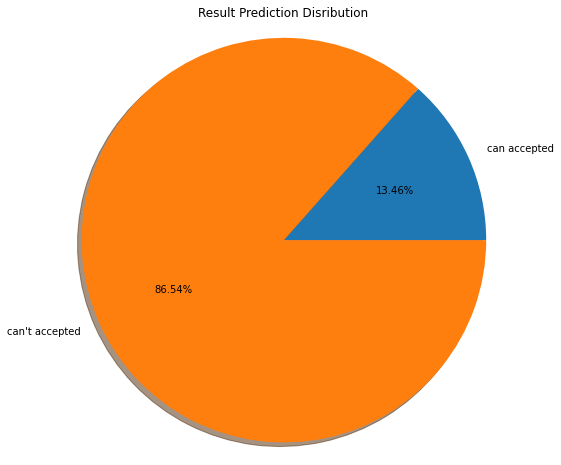

In [72]:
data_pie = [best_predict.shape[0], df_eval.shape[0]]
label_pie = ['can accepted',"can't accepted"]

plt.figure(figsize=(8,8))
plt.pie(data_pie, labels=label_pie, autopct='%1.2f%%',shadow=True)
plt.title('Result Prediction Disribution')
plt.axis('equal')
plt.show()